In [1]:
!pip install qiskit qiskit[visualization] qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 10.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a3e0e34228022e804c1dea311c71ff0f41eb4bafa7f513e3f77aeb9d3dc0d2b7
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import HamiltonianGate

from qiskit.providers.fake_provider import GenericBackendV2

In [17]:
numero = '110'

In [18]:
l = len(numero)

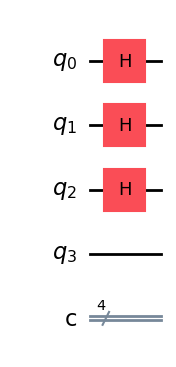

In [19]:
qc = QuantumCircuit(l + 1, l + 1)
for ii in range(l):
  qc.h(ii)

qc.draw('mpl')

In [ ]:
numero = '110'

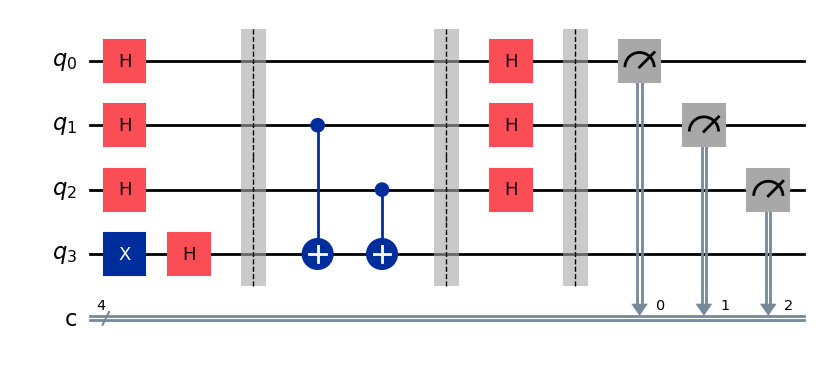

In [27]:
qc = QuantumCircuit(l + 1, l + 1)
qc.h(range(l))
qc.x(l)
qc.h(l)
qc.barrier()
qc.cx(1, l)
qc.cx(2, l)
qc.barrier()
qc.h(range(l))
qc.barrier()
qc.measure(range(l), range(l))

qc.draw('mpl')

{'0110': 1}


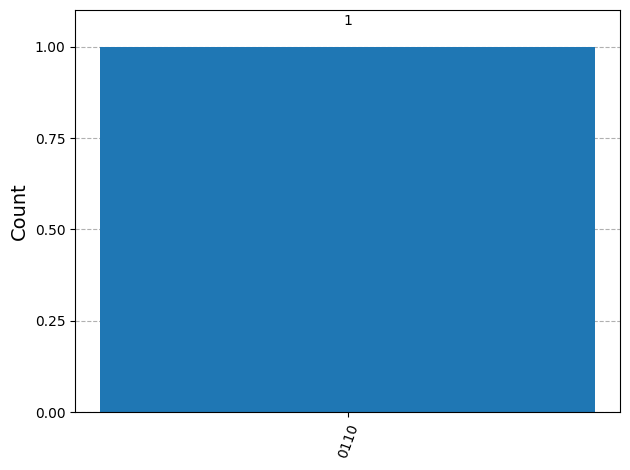

In [30]:
shots = 1
backend = AerSimulator()
qc_tr = transpile(qc, backend)
job = backend.run(qc_tr, shots=shots)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

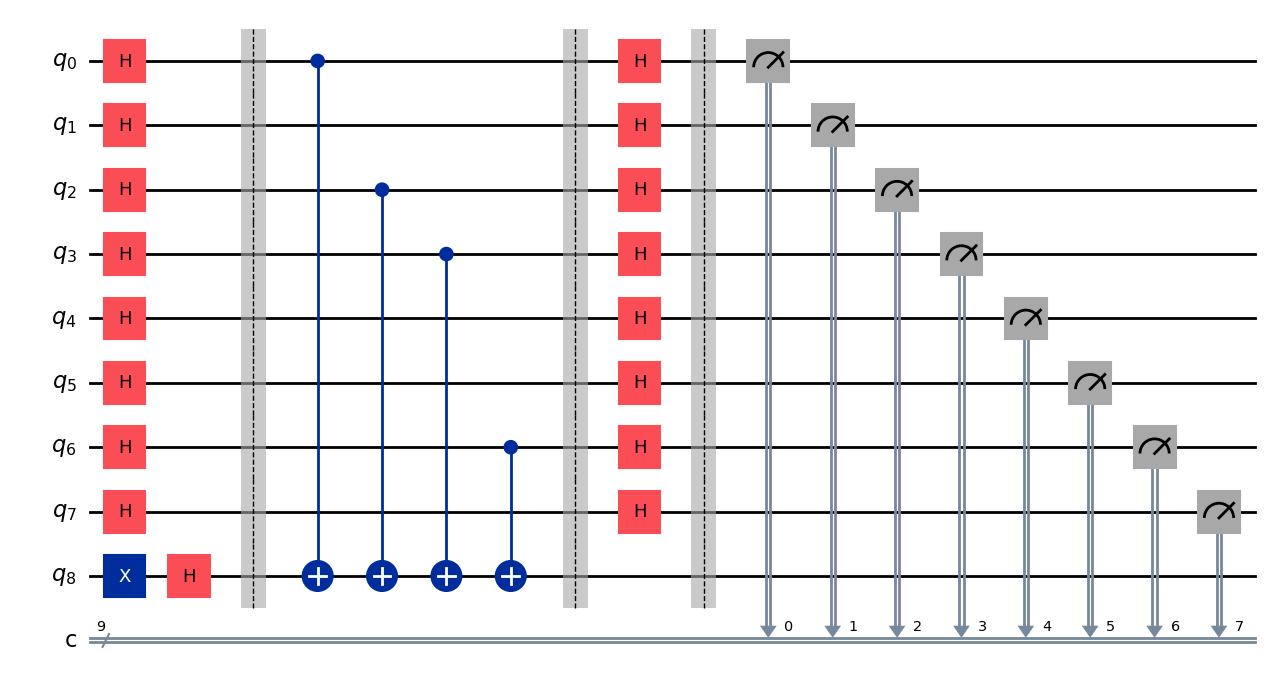

In [32]:
numero = '01001101'
l = len(numero)

qc = QuantumCircuit(l + 1, l + 1)
qc.h(range(l))
qc.x(l)
qc.h(l)
qc.barrier()
qc.cx(0, l)
qc.cx(2, l)
qc.cx(3, l)
qc.cx(6, l)
qc.barrier()
qc.h(range(l))
qc.barrier()
qc.measure(range(l), range(l))

qc.draw('mpl')

{'001001101': 1}


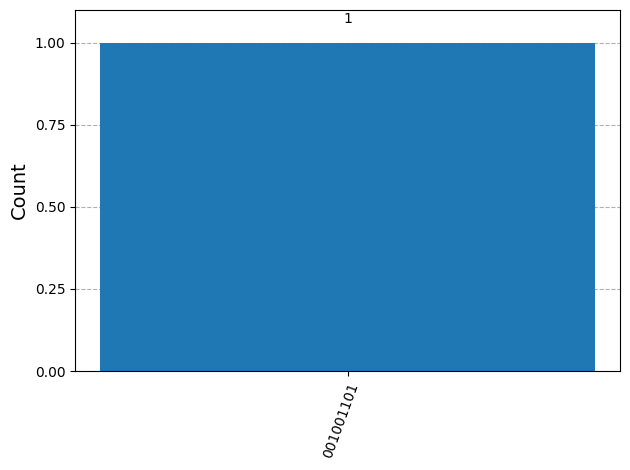

In [33]:
shots = 1
backend = AerSimulator()
qc_tr = transpile(qc, backend)
job = backend.run(qc_tr, shots=shots)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [34]:
print(numero)

01001101


01001101
{'001001101': 1}


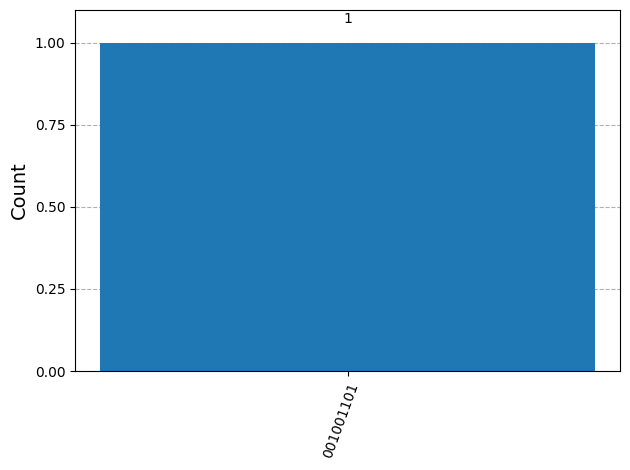

In [40]:
shots = 1
backend = GenericBackendV2(l + 1)
qc_tr = transpile(qc, backend)
job = backend.run(qc_tr, shots=shots)
result = job.result()
counts = result.get_counts()
print(numero)
print(counts)
plot_histogram(counts)

In [44]:
con = 0
print(numero)
for dig in numero:
  print(con,') ',dig)
  con += 1

01001101
0 )  0
1 )  1
2 )  0
3 )  0
4 )  1
5 )  1
6 )  0
7 )  1


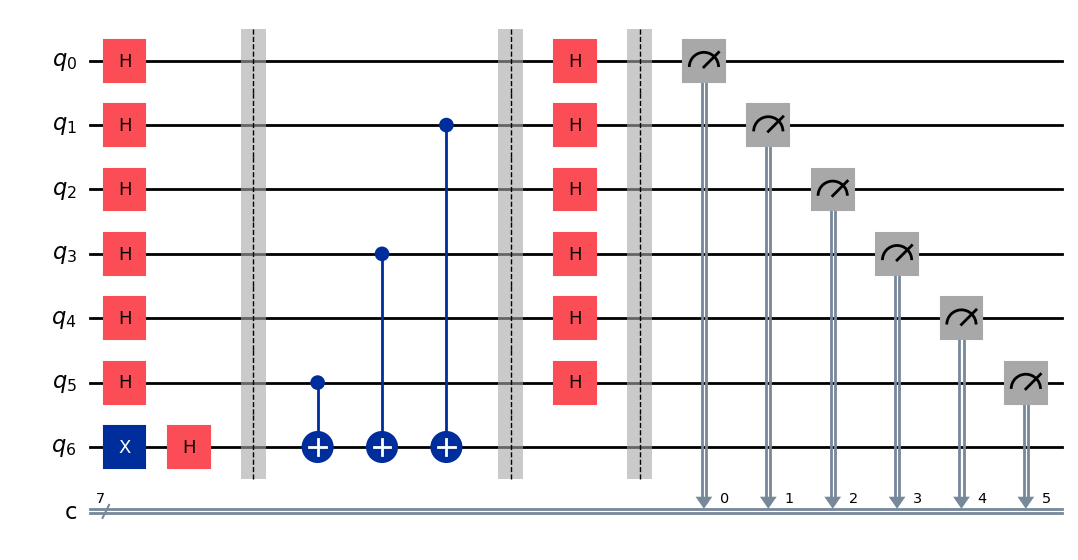

In [53]:
numero = '101010'
l = len(numero)

qc = QuantumCircuit(l + 1, l + 1)
qc.h(range(l))
qc.x(l)
qc.h(l)
qc.barrier()
con = l - 1
for dig in numero:
  if dig == '1':
    qc.cx(con, l)
  con -= 1
qc.barrier()
qc.h(range(l))
qc.barrier()
qc.measure(range(l), range(l))

qc.draw('mpl')

101010
{'0101010': 1}


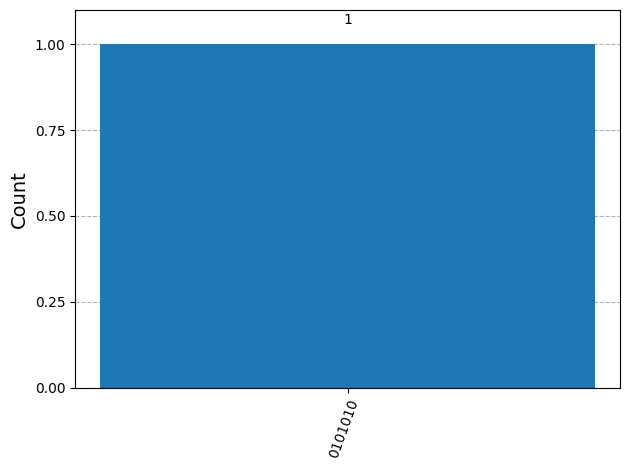

In [54]:
shots = 1
backend = AerSimulator()
qc_tr = transpile(qc, backend)
job = backend.run(qc_tr, shots=shots)
result = job.result()
counts = result.get_counts()
print(numero)
print(counts)
plot_histogram(counts)